# Loi de Benford et l'ensenble des protéines reviewed d'UniProt avec le module benford

ce script a pour but de vérifier si la taille de l'ensemble des protéine reviewed d'UniProt suit la loi de Benford

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import benford

%load_ext autoreload
%autoreload 2

In [6]:
data = pd.read_csv("uniprot-reviewed yes.tab", sep = "\t" , index_col = 0)
data.head()

,Entry Length
Q8K9I1,960
Q664P8,255
Q66K14,1250
Q8E4B4,239
B3CQ06,426


In [7]:
data.describe()

,Entry Length
count,564638.000000
mean,360.442643
std,336.460236
min,2.000000
25%,169.000000
50%,294.000000
75%,449.000000
max,35213.000000


## Distribution de la longueur des protéines reviewed d'uniprot

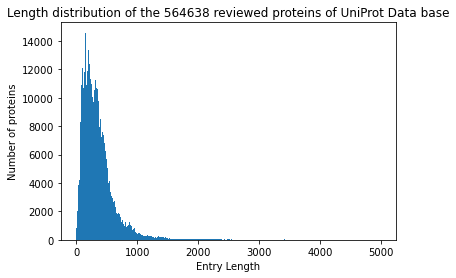

In [8]:
plt.hist(data["Entry Length"], bins=range(0, 5000, 10))
plt.title(f"Length distribution of the {data.shape[0]} reviewed proteins of UniProt Data base")
plt.xlabel("Entry Length")
plt.ylabel("Number of proteins");

In [9]:
data[data["Entry Length"] > 5000].shape

(187, 1)

## Analyse des $1^{er}$ digit de la longeur des protéines reviewed d'uniprot par rapport à la loi de benford

In [10]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(data["Entry Length"])

### Histogramme de la fréquence des first digit de la loi de Benford et de la taille de l'ensemble des protéines reviewed d'UniProt

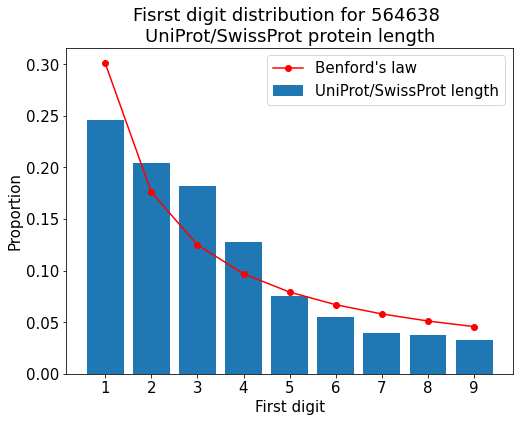

In [22]:
plt.rc('font', size=15)
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                      title=(f"Fisrst digit distribution for {data.shape[0]} \nUniProt/SwissProt protein length"),
                      legend="UniProt/SwissProt length", size=(8, 6))
plt.savefig("benford_distrib_uniprot.png");

### Test statistique par la procédure "bootstrap"

In [20]:
%%time 
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(data["Length"], f_benford, nb_digit=1)

statistics : 73.71313430542904 ; p-value : 8.924684077215899e-13 ; number of significant tests : 1000
CPU times: user 12.4 s, sys: 3.77 ms, total: 12.4 s
Wall time: 12.4 s


Le résultat du test montre que le premier chiffre significatif de la taille des protéines reviewed d'UniProt ne suit pas la loi de Benford pour un risque $\alpha = 5\%$.

## Analyse des deux $1^{er}$ digit de la longeur des protéines reviewed d'uniprot par rapport à la loi de benford

In [26]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(data["Length"],2)

### Histogramme de la fréquence des first digit de la loi de Benford et de la taille de l'ensemble des protéines reviewed d'UniProt

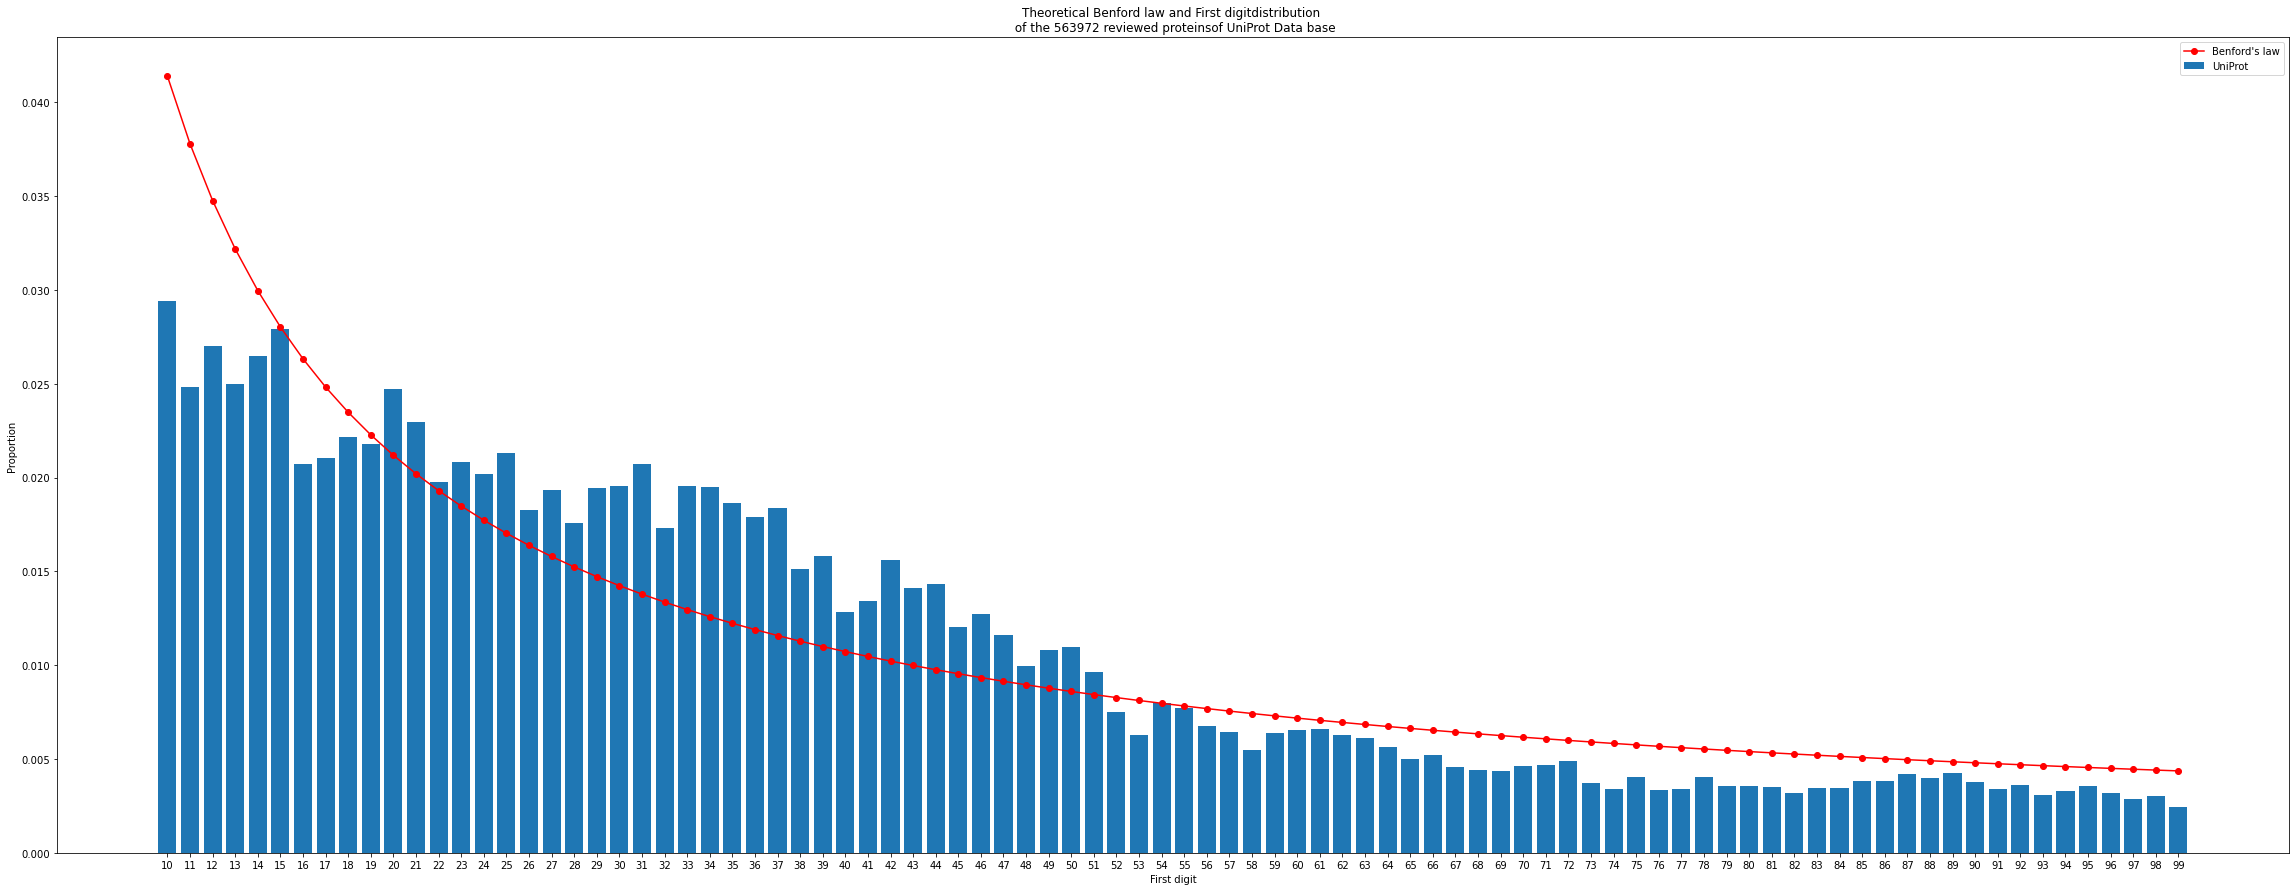

In [27]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                     title=("Theoretical Benford law and First digit"
                     f"distribution \n of the {data.shape[0]} reviewed proteins"
                     "of UniProt Data base"), legend="UniProt",
                     size=(40,15))

### Test statistique par la procédure "bootstrap"

In [22]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(data["Length"], f_benford, nb_digit=2)

statistics : 162.79456408074796 ; p-value : 3.018141050361218e-06 ; number of significant tests : 991
CPU times: user 13.3 s, sys: 7.79 ms, total: 13.4 s
Wall time: 13.3 s


Le résultat du test montre que les deux premiers chiffres significatifs de la taille des protéines reviewed d'UniProt ne suit pas la loi de Benford pour un risque $\alpha = 5\%$.